In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

<b>Data Collection</b>

In [2]:
data_path = 'Projects/Creditcard Fraud Detection/creditcard.csv'
df = pd.read_csv(data_path)

In [90]:
data1=pd.read_csv(data_path)

In [3]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<b>Data Analysis</b>

In [5]:
print("\nInformation about the dataset:")
print(df.info())
print('-'*35)
print("\nSummary statistics for numerical columns:")
print(df.describe())
print('-'*35)
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 n

<b>Data Visualization</b>

<Axes: xlabel='Class', ylabel='count'>

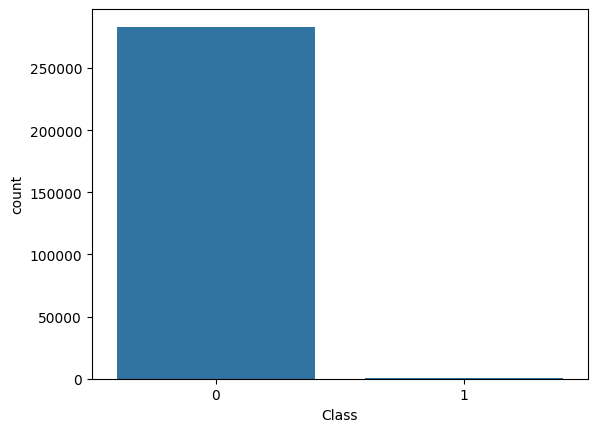

In [15]:
# Total no of Fraud and not fraud
sns.countplot(x='Class',data=df)

In [16]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

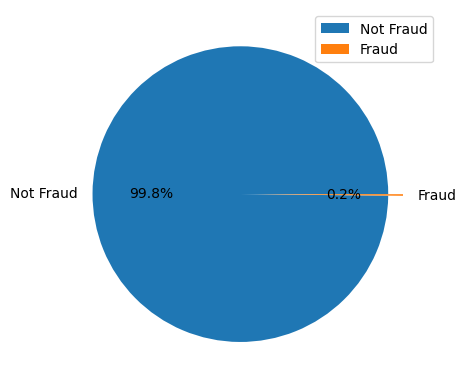

In [17]:
x = ["Not Fraud", "Fraud"]
y = np.array([284315,492])
explode = (0.1, 0)
plt.pie(y,labels=x,explode=explode,autopct='%1.1f%%')
plt.legend()
plt.show()

<b>Normalization</b>

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [9]:
# Normalize
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(pd.DataFrame(df['Amount']))

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [21]:
df = df.drop(['Time'],axis=1)

In [11]:
df.duplicated().sum()

1081

In [12]:
df.shape

(284807, 31)

In [13]:
df=df.drop_duplicates()

In [14]:
df.shape

(283726, 31)

<b>Under Sampling</b>

In [29]:
# Handling imbalanced data by under sampling
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [23]:
normal.shape

(283253, 30)

In [24]:
fraud.shape

(473, 30)

In [26]:
normal_sample=normal.sample(n=473)

In [27]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [28]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

<b>Over Sampling</b>

In [97]:
X = df.drop('Class',axis=1)
y = df['Class']

In [98]:
X.shape

(283726, 29)

In [99]:
y.shape

(283726,)

In [100]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)
y_res.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

<b>Splitting the dataset into train and test</b>

In [30]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [104]:
# Predict on the test set
y_pred = model.predict(X_test)

<b> Evaluating the model </b>

In [105]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56463
           1       0.97      0.91      0.94     56839

    accuracy                           0.94    113302
   macro avg       0.95      0.94      0.94    113302
weighted avg       0.95      0.94      0.94    113302



In [106]:
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of training data :  0.9438442732191242
Accuracy score of test data :  0.943752096167764


In [107]:
# Randomly select one row from the DataFrame
random_row = data1.sample(n=1)
print(random_row['Class'])
random_values = random_row[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']].values

8267    0
Name: Class, dtype: int64


In [115]:
data = np.array(random_values)
data_with_feature_names = pd.DataFrame(data, columns=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
# print(data_with_feature_names)

In [113]:
input_data = [0.72564574,	2.300894438,	-5.329976183,	4.007682805,	-1.73041059,	-1.732192568,	-3.968592618,	1.063728153, -0.486096552,	-4.624984954,	5.588723915,
              -7.148242636,	1.680450741,	-6.210257747,	0.495282118,	-3.599540209,	-4.830324242,	-0.64909012,	2.250123249,	0.504646226,
              0.589669127,	0.109541319,	0.601045277,	-0.364700278,	-1.843077692,	0.351909298,	0.594549978,	0.099372236,	1]	
input_data_as_numpy_array = np.asarray(input_data)
data = input_data_as_numpy_array.reshape(1,-1)
# print(input_data_reshaped)

In [114]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names, but LogisticRegression was fitted with feature names")

prediction = model.predict(data)
print(prediction)
if prediction[0]==0:
    print("Normal")
if prediction[0]==1:
    print("Fraud")

[1]
Fraud
